# Naïve-Bayes Algorithm Implementation on UNSW-NB15 Dataset

Implementation of Naïve-Bayes Classifier algorithm on the University of New South Wales NB15 Dataset.

## Importing libraries and f
itting the data

In [19]:
import pandas as pd
import pickle as pk
import numpy as np
import matplotlib as plt
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, f1_score

In [20]:
with open('../1.Data_Processing/dataset-nids.pkl', 'rb') as f:
    X_train, y_train, X_test, y_test = pk.load(f)

In [21]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3549974, 7), (3549974,), (508003, 7), (508003,))

In [35]:
gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 508003 points : 8206


## Plotting the Confusion Matrix

In [55]:
from sklearn.metrics import precision_recall_curve, auc, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

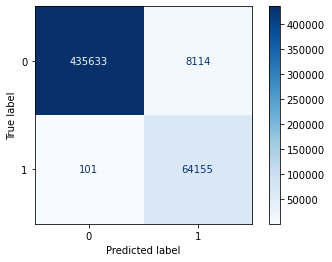

In [58]:
gnb_fit = gnb.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(gnb_fit, X_test, y_test, cmap = 'Blues')

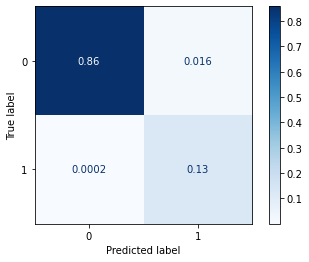

In [61]:
gnb_fit = gnb.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(gnb_fit, X_test, y_test, normalize = 'all', cmap = 'Blues')

## Plotting the ROC curve

In [44]:
y_pred_prob = gnb_fit.predict_proba(X_test)[::,1]

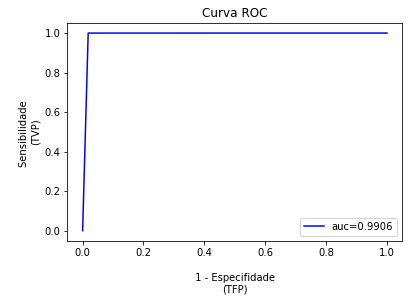

In [47]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr,tpr,color='blue',label="auc="+str(round(auc,4)))
plt.ylabel('\nSensibilidade \n(TVP)')
plt.xlabel('\n 1 - Especifidade \n(TFP)')
plt.title('Curva ROC')
plt.legend(loc=4)
plt.show()

## Executing the Cross Validation

In [48]:
X_train = np.concatenate((X_train,X_test), axis = 0)
y_train = np.concatenate((y_train,y_test), axis = 0)

In [51]:
X_train.shape, y_train.shape

((4057977, 7), (4057977,))

In [52]:
from sklearn.model_selection import KFold, cross_validate

In [54]:
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc' ]
gnb = GaussianNB()
gnb.fit(X_train, y_train)
metrics = cross_validate(gnb, X_train, y_train, cv=10, scoring= metrics)

for met in metrics:
    print(f"- {met}:")
    print(f"-- {metrics[met]}\n")
    print(f"-- {np.mean(metrics[met])} +- {np.std(metrics[met])}\n")  

- fit_time:
-- [0.65906787 0.64974332 0.64274049 0.64339232 0.64601684 0.64754868
 0.64948249 0.65412426 0.64857864 0.64775491]

-- 0.6488449811935425 +- 0.004599195142873909

- score_time:
-- [0.44036531 0.38419127 0.38478756 0.38595319 0.38556886 0.38499498
 0.3889184  0.38786769 0.38300109 0.41690135]

-- 0.3942549705505371 +- 0.01804431734251637

- test_accuracy:
-- [0.98962292 0.98980281 0.98959827 0.98995313 0.98934445 0.98972149
 0.98963277 0.98992107 0.98962289 0.98959578]

-- 0.989681558100272 +- 0.00016870308393941298

- test_precision:
-- [0.97853803 0.97882166 0.97828725 0.97883863 0.97777648 0.97854249
 0.97830912 0.97896469 0.97827811 0.97852137]

-- 0.9784877830549503 +- 0.0003302584410581536

- test_recall:
-- [0.9990159  0.99911921 0.99922795 0.99943999 0.99920076 0.99923338
 0.99928231 0.99923338 0.99929319 0.9989724 ]

-- 0.9992018456737265 +- 0.0001297106020263964

- test_f1:
-- [0.98867094 0.98886629 0.98864673 0.98903204 0.98837253 0.9887797
 0.9886845  0.9889952 